In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from config_store import targetDataSet
from utility_functions import dataSetSplit, doKFold, score

In [2]:
# Import and preview data set
data = pd.read_csv(targetDataSet)
data.head()

,Website,Length,Protocol,Info
0,0,66,1,4
1,0,66,1,1
2,0,54,1,6
3,0,712,0,12
4,0,1490,0,8


In [3]:
# Separate data set using test/train split
XTrain, XTest, yTrain, yTest = dataSetSplit(data.drop(columns = ["Website"]).values, data["Website"].values)

In [4]:
# Perform k-fold to optimize k hyperparameter
neighborRange = np.array(range(1, 20))

# Hold k-fold result for each possible k neighbor value
train = []
test = []

# Perform k-fold for each possible hyperparameter value
for neighbor in neighborRange:
    knn = KNN(n_neighbors = neighbor)
    trainResult, testResult = doKFold(knn, XTrain, yTrain)
    
    train.append(np.mean(trainResult))
    test.append(np.mean(testResult))

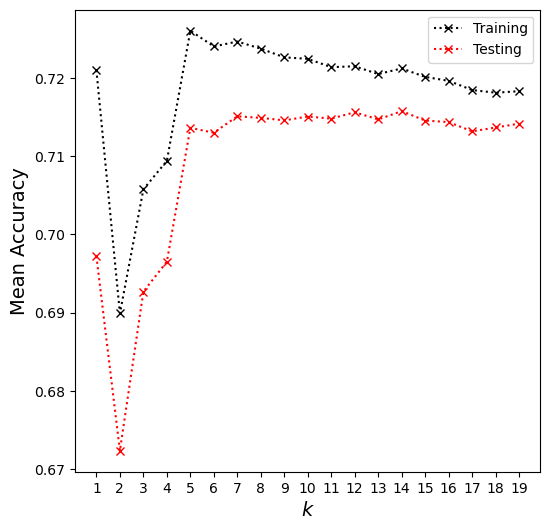

In [5]:
plt.figure(figsize = (6, 6))
plt.plot(neighborRange, train, ":xk", label = "Training")
plt.plot(neighborRange, test, ":xr", label = "Testing")
plt.ylabel("Mean Accuracy", fontsize = 14)
plt.xlabel("$k$",fontsize = 14)
plt.xticks(neighborRange)
plt.legend()
plt.show()

In [6]:
# Get optimal hyperparameter for KNN
maxIndex = (test == np.max(test))
print(neighborRange[maxIndex])
print(np.max(test))
print(np.max(train))

[14]
0.7157389162561577
0.7260125889436233


In [7]:
# Final KNN model
knn = KNN(n_neighbors = neighborRange[maxIndex][0])
knn.fit(XTrain, yTrain)

KNeighborsClassifier(n_neighbors=14)

In [8]:
# Score model
score(knn, XTrain, yTrain, XTest, yTest)

Training score: 0.7201970443349753
Testing score: 0.7182543591764358
